In [8]:
%%javascript
  function ClickConnect() {
    var iconElement = document.getElementById("toggle-header-button");
    if (iconElement) {
    var clickEvent = new MouseEvent ("click", {
        bubbles: true, cancelable: true,
        view: window
      });
    iconElement.dispatchEvent (clickEvent);
    }
  }
  setInterval(ClickConnect, 6000);

<IPython.core.display.Javascript object>

In [9]:
import os
import glob
import shutil
import random
from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Instalar dependencias
print("Instalando dependencias...")
!apt-get update -qq
!apt-get install -qq --no-install-recommends \
    build-essential cmake git libpng-dev libjpeg-dev libtiff-dev \
    libglu1-mesa-dev libxmu-dev libxi-dev libatlas-base-dev libsuitesparse-dev \
    libboost-iostreams-dev libboost-program-options-dev libboost-system-dev \
    libboost-serialization-dev libopencv-dev libopencv-core-dev \
    libopencv-imgproc-dev libopencv-features2d-dev \
    libgoogle-glog-dev libgflags-dev \
    libglew-dev glew-utils freeglut3-dev mesa-common-dev \
    libprotobuf-dev protobuf-compiler libgomp1

Instalando dependencias...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 124124 files and directories currently installed.)
Preparing to unpack .../00-freeglut3_2.8.1-6_amd64.deb ...
Unpacking freeglut3:amd64 (2.8.1-6) ...
Selecting previously unselected package libglvnd-core-dev:amd64.
Preparing to unpack .../01-libglvnd-core-dev_1.4.0-1_amd64.deb ...
Unpacking libglvnd-core-dev:amd64 (1.4.0-1) ...
Selecting previously unselected package libegl-dev:amd64.
Preparing to unpack .../02-libegl-dev_1.4.0-1_amd64.deb ...
Unpacking libegl-dev:amd64 (1.4.0-1) ...
Selecting previously unselected package libgles1:amd64.
Preparing to unpack .../03-libgles1_1.4.0-1_amd64.deb ...
Unpacking libgles1:amd64 (1.4.0-1) ...
Selecting previously u

In [11]:
# Instalar Eigen
!apt-get install -qq libeigen3-dev

# Instalar CGAL y sus dependencias
!apt-get install -qq libcgal-dev libcgal-qt5-dev

# Instalar Ceres Solver
!apt-get install -qq libceres-dev

Selecting previously unselected package libeigen3-dev.
(Reading database ... 125160 files and directories currently installed.)
Preparing to unpack .../libeigen3-dev_3.4.0-2ubuntu2_all.deb ...
Unpacking libeigen3-dev (3.4.0-2ubuntu2) ...
Setting up libeigen3-dev (3.4.0-2ubuntu2) ...
Extracting templates from packages: 100%
Selecting previously unselected package libqt5core5a:amd64.
(Reading database ... 125781 files and directories currently installed.)
Preparing to unpack .../00-libqt5core5a_5.15.3+dfsg-2ubuntu0.2_amd64.deb ...
Unpacking libqt5core5a:amd64 (5.15.3+dfsg-2ubuntu0.2) ...
Selecting previously unselected package libevdev2:amd64.
Preparing to unpack .../01-libevdev2_1.12.1+dfsg-1_amd64.deb ...
Unpacking libevdev2:amd64 (1.12.1+dfsg-1) ...
Selecting previously unselected package libmtdev1:amd64.
Preparing to unpack .../02-libmtdev1_1.1.6-1build4_amd64.deb ...
Unpacking libmtdev1:amd64 (1.1.6-1build4) ...
Selecting previously unselected package libgudev-1.0-0:amd64.
Preparing

In [12]:
# Clonar y compilar OpenMVG
print("Clonando y compilando OpenMVG...")
if os.path.exists('openMVG'):
    shutil.rmtree('openMVG')
if os.path.exists('openMVG_Build'):
    shutil.rmtree('openMVG_Build')
!git clone --recursive https://github.com/openMVG/openMVG.git
os.makedirs('openMVG_Build', exist_ok=True)
os.chdir('openMVG_Build')
!cmake -DCMAKE_BUILD_TYPE=RELEASE ../openMVG/src/
!make -j4
os.chdir('..')

Clonando y compilando OpenMVG...
Cloning into 'openMVG'...
remote: Enumerating objects: 35190, done.
remote: Counting objects: 100% (7538/7538), done.
remote: Compressing objects: 100% (2409/2409), done.
remote: Total 35190 (delta 5484), reused 6937 (delta 5096), pack-reused 27652 (from 1)
Receiving objects: 100% (35190/35190), 30.84 MiB | 15.26 MiB/s, done.
Resolving deltas: 100% (25413/25413), done.
Submodule 'src/dependencies/cereal' (https://github.com/openMVG-thirdparty/cereal.git) registered for path 'src/dependencies/cereal'
Submodule 'src/dependencies/glfw' (https://github.com/elmindreda/glfw.git) registered for path 'src/dependencies/glfw'
Submodule 'src/dependencies/osi_clp' (https://github.com/openMVG-thirdparty/osi_clp.git) registered for path 'src/dependencies/osi_clp'
Cloning into '/content/openMVG/src/dependencies/cereal'...
remote: Enumerating objects: 6563, done.        
remote: Total 6563 (delta 0), reused 0 (delta 0), pack-reused 6563 (from 1)        
Receiving objec

In [13]:
# Clonar y compilar VCGlib (necesario para OpenMVS)
print("Clonando VCGlib...")
!git clone https://github.com/cdcseacave/VCG.git vcglib
!cp -r vcglib/vcglib /usr/local/include/

Clonando VCGlib...
Cloning into 'vcglib'...
remote: Enumerating objects: 40173, done.
remote: Counting objects: 100% (1924/1924), done.
remote: Compressing objects: 100% (1513/1513), done.
remote: Total 40173 (delta 556), reused 1371 (delta 375), pack-reused 38249 (from 1)
Receiving objects: 100% (40173/40173), 18.80 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (26047/26047), done.
cp: cannot stat 'vcglib/vcglib': No such file or directory


In [14]:
# Clonar y compilar OpenMVS
print("Clonando y compilando OpenMVS...")
if os.path.exists('openMVS'):
    shutil.rmtree('openMVS')
if os.path.exists('openMVS_build'):
    shutil.rmtree('openMVS_build')
!git clone --recursive https://github.com/cdcseacave/openMVS.git
os.makedirs('openMVS_build', exist_ok=True)
os.chdir('openMVS_build')
!cmake -DCMAKE_BUILD_TYPE=Release \
       -DVCG_ROOT="/usr/local/include/vcglib" \
       ../openMVS
!make -j4
os.chdir('..')
print("OpenMVS compilado correctamente.")

Clonando y compilando OpenMVS...
Cloning into 'openMVS'...
remote: Enumerating objects: 5805, done.
remote: Counting objects: 100% (1990/1990), done.
remote: Compressing objects: 100% (522/522), done.
remote: Total 5805 (delta 1738), reused 1555 (delta 1467), pack-reused 3815 (from 1)
Receiving objects: 100% (5805/5805), 4.80 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (4287/4287), done.
-- The CXX compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detected version of GNU GCC: 114 (1104)
Compiling with C++20
-- Performing Test HAVE_CXX_W
-- Performing Test HAVE_CXX_W - Success
-- Performing Test HAVE_CXX_WALL
-- Performing Test HAVE_CXX_WALL - Success
-- Performing Test HAVE_CXX_WERROR_ADDRESS
-- Performing Test HAVE_CXX_WERROR_ADDRESS - Success
-- Performing Test HAVE_CXX_WERROR_SEQUE

In [15]:
print("Ejecutables de OpenMVG:")
!find openMVG_Build/ -type f -executable

print("Ejecutables de OpenMVS:")
!find openMVS_Build/ -type f -executable


Ejecutables de OpenMVG:
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep/test/test_wasm/test_wasm.sh
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep/test/check_inline_specifier.sh
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep/docs/source/api/cast_index.rst
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep-build/CMakeFiles/3.30.5/CompilerIdC/a.out
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep-build/CMakeFiles/3.30.5/CompilerIdCXX/a.out
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep-build/CMakeFiles/3.30.5/CMakeDetermineCompilerABI_C.bin
openMVG_Build/arrow/src/arrow_cpp-build/src/xsimd_ep-build/CMakeFiles/3.30.5/CMakeDetermineCompilerABI_CXX.bin
openMVG_Build/arrow/src/arrow_cpp-build/CMakeFiles/3.30.5/CompilerIdC/a.out
openMVG_Build/arrow/src/arrow_cpp-build/CMakeFiles/3.30.5/CompilerIdCXX/a.out
openMVG_Build/arrow/src/arrow_cpp-build/CMakeFiles/3.30.5/CMakeDetermineCompilerABI_C.bin
openMVG_Build/arrow/src/arrow_cpp-build/CMakeFiles/3.30.5/CMakeDetermin

In [16]:
# Configurar directorios locales
local_input = '/content/input'
local_output = '/content/output'
shutil.rmtree(local_input, ignore_errors=True)
shutil.rmtree(local_output, ignore_errors=True)
os.makedirs(local_input, exist_ok=True)
os.makedirs(local_output, exist_ok=True)

In [17]:
# Directorios en Google Drive
drive_input_dir = "/content/drive/MyDrive/SIS421/Examen Final - SIS421/Dataset/"
drive_output_dir = "/content/drive/MyDrive/SIS421/Examen Final - SIS421/Escena/"

# Copiar imágenes desde Google Drive a directorio local
print("Copiando imágenes al directorio local...")
image_files = glob.glob(os.path.join(drive_input_dir, "*.jpg"))
image_files.extend(glob.glob(os.path.join(drive_input_dir, "*.png")))
if not image_files:
    raise FileNotFoundError("No se encontraron imágenes en el directorio de entrada.")
for image_file in image_files:
    shutil.copy2(image_file, local_input)
for file in os.listdir(local_input):
    file_path = os.path.join(local_input, file)
    os.chmod(file_path, 0o644)
print(f"Se copiaron {len(image_files)} imágenes")

Copiando imágenes al directorio local...
Se copiaron 328 imágenes


Se encontraron 328 imágenes
Mostrando imagen de ejemplo:


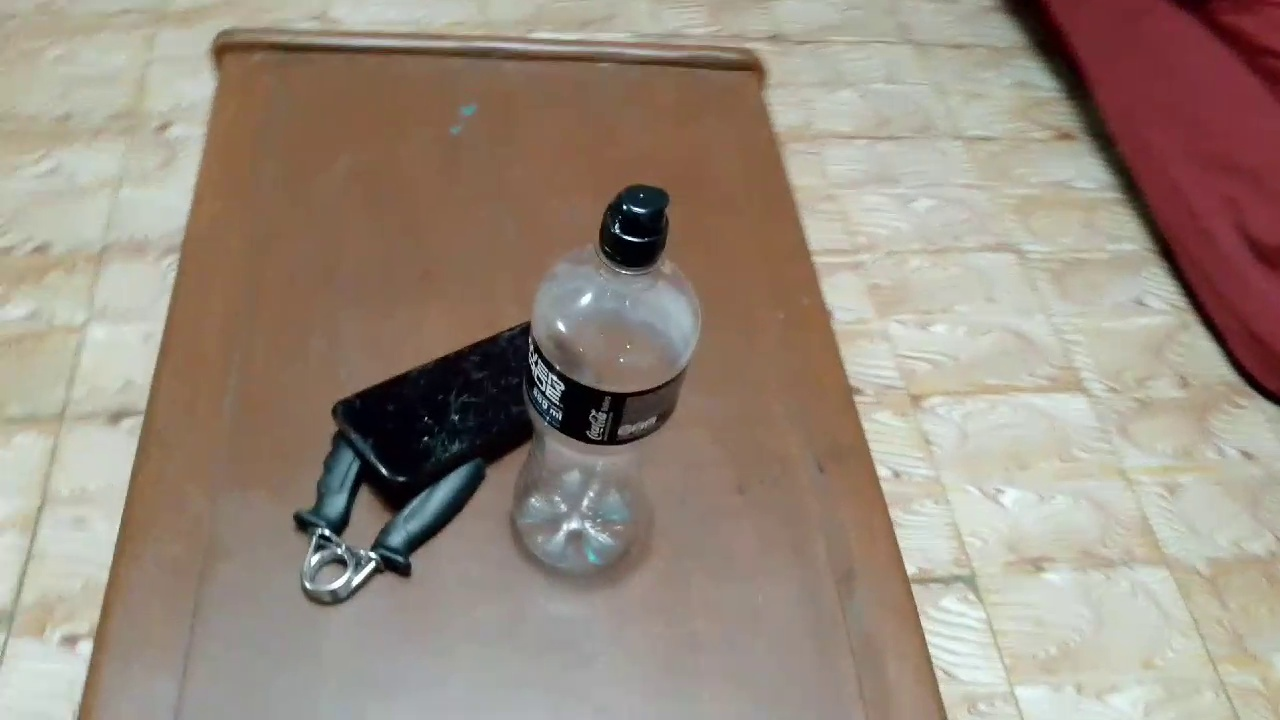

In [18]:
# Verificar imágenes
images = glob.glob(os.path.join(local_input, "*.jpg"))
images.extend(glob.glob(os.path.join(local_input, "*.png")))
if not images:
    raise FileNotFoundError("No se encontraron imágenes (jpg/png) en la carpeta especificada.")
print(f"Se encontraron {len(images)} imágenes")
if len(images) > 0:
    print("Mostrando imagen de ejemplo:")
    display(Image(images[random.randint(0, len(images) - 1)]))

In [19]:
# Ruta a los ejecutables de OpenMVG
OPENMVG_SFM_BIN = "openMVG_Build/Linux-x86_64-RELEASE"

# Ruta a los ejecutables de OpenMVS
OPENMVS_BIN = "openMVS_build/bin"

In [20]:
# Ejecutar pipeline de SFM
try:
    matches_dir = os.path.join(local_output, "matches")
    reconstruction_dir = os.path.join(local_output, "reconstruction_sequential")
    mvs_dir = os.path.join(local_output, "mvs")
    os.makedirs(matches_dir, exist_ok=True)
    os.makedirs(reconstruction_dir, exist_ok=True)
    os.makedirs(mvs_dir, exist_ok=True)

    print("Iniciando listado de imágenes...")
    !{OPENMVG_SFM_BIN}/openMVG_main_SfMInit_ImageListing \
     -i {local_input} \
     -o {matches_dir} \
     -d openMVG/src/openMVG/exif/sensor_width_database/sensor_width_camera_database.txt \
     -c 3

    print("Iniciando cálculo de características...")
    !{OPENMVG_SFM_BIN}/openMVG_main_ComputeFeatures \
     -i {os.path.join(matches_dir, 'sfm_data.json')} \
     -o {matches_dir} \
     -m SIFT \
     -n 4

    print("Iniciando cálculo de coincidencias...")
    !{OPENMVG_SFM_BIN}/openMVG_main_ComputeMatches \
     -i {os.path.join(matches_dir, 'sfm_data.json')} \
     -o {matches_dir}

    print("Iniciando reconstrucción incremental...")
    !{OPENMVG_SFM_BIN}/openMVG_main_IncrementalSfM \
     -i {os.path.join(matches_dir, 'sfm_data.json')} \
     -m {matches_dir} \
     -o {reconstruction_dir}

    print("Convirtiendo a formato OpenMVS...")
    !{OPENMVG_SFM_BIN}/openMVG_main_openMVG2openMVS \
     -i {os.path.join(reconstruction_dir, 'sfm_data.bin')} \
     -o {os.path.join(mvs_dir, 'scene.mvs')} \
     -d {mvs_dir}

    print("Iniciando densificación de nube de puntos...")
    !{OPENMVS_BIN}/DensifyPointCloud \
     {os.path.join(mvs_dir, 'scene.mvs')} \
     -w {mvs_dir}

    print("Iniciando reconstrucción de malla...")
    !{OPENMVS_BIN}/ReconstructMesh \
     {os.path.join(mvs_dir, 'scene_dense.mvs')} \
     -w {mvs_dir}

    print("Iniciando refinamiento de malla...")
    !{OPENMVS_BIN}/RefineMesh \
     {os.path.join(mvs_dir, 'scene_dense_mesh.mvs')} \
     -w {mvs_dir}

    print("Iniciando texturizado de malla...")
    !{OPENMVS_BIN}/TextureMesh \
     {os.path.join(mvs_dir, 'scene_dense_mesh_refine.mvs')} \
     -w {mvs_dir}

    print("Pipeline de SFM completado exitosamente")
except Exception as e:
    print(f"Error en el pipeline de SFM: {str(e)}")
    raise

Iniciando listado de imágenes...
INFO: [main_SfMInit_ImageListing.cpp:194]  You called : openMVG_Build/Linux-x86_64-RELEASE/openMVG_main_SfMInit_ImageListing
--imageDirectory /content/input
--sensorWidthDatabase openMVG/src/openMVG/exif/sensor_width_database/sensor_width_camera_database.txt
--outputDirectory /content/output/matches
--focal -1
--intrinsics 
--camera_model 3
--group_camera_model 1
--use_pose_prior 0
--prior_weights 1.0;1.0;1.0
--gps_to_xyz_method 0
INFO: [loggerprogress.hpp:79] [- Listing images -] 10%
INFO: [loggerprogress.hpp:79] [- Listing images -] 20%
INFO: [loggerprogress.hpp:79] [- Listing images -] 30%
INFO: [loggerprogress.hpp:79] [- Listing images -] 40%
INFO: [loggerprogress.hpp:79] [- Listing images -] 50%
INFO: [loggerprogress.hpp:79] [- Listing images -] 60%
INFO: [loggerprogress.hpp:79] [- Listing images -] 70%
INFO: [loggerprogress.hpp:79] [- Listing images -] 80%
INFO: [loggerprogress.hpp:79] [- Listing images -] 90%
INFO: [loggerprogress.hpp:79] [- List

In [21]:
# Entrenar Gaussian Splatting
try:
    os.chdir('gaussian-splatting')
    print("Entrenando Gaussian Splatting...")
    !python train.py -s {local_output}
    print("Entrenamiento completado exitosamente")
except Exception as e:
    print(f"Error en el entrenamiento: {str(e)}")
    raise
finally:
    os.chdir('..')

Error en el entrenamiento: [Errno 2] No such file or directory: 'gaussian-splatting'


FileNotFoundError: [Errno 2] No such file or directory: 'gaussian-splatting'

In [ ]:
# Copiar resultados a Google Drive
print("Copiando resultados a Google Drive...")
if os.path.exists(local_output):
    os.makedirs(drive_output_dir, exist_ok=True)
    for item in os.listdir(local_output):
        source = os.path.join(local_output, item)
        destination = os.path.join(drive_output_dir, item)
        if os.path.isdir(source):
            shutil.copytree(source, destination, dirs_exist_ok=True)
        else:
            shutil.copy2(source, destination)
    print("Resultados copiados exitosamente")

print("¡Proceso completado exitosamente!")

# Limpiar directorios temporales
print("Limpiando directorios temporales...")
shutil.rmtree('/content/input', ignore_errors=True)
shutil.rmtree('/content/output', ignore_errors=True)